<a href="https://colab.research.google.com/github/moreira-rod/PosTechFiap-DataAnalytics-Python/blob/main/Fase_1_Python.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Aula 1 - Biblioteca Pandas

- A Biblioteca pandas serviu para carregar o csv
- O encoding foi para ajustar a linguagem do arquivo (para reconhecer ^, ç, ~ e etc...)
- Skiprows pulou 3 linhas do começo do arquivo
- Sep alterou o delimitador de , para ;
- Skipfooter desconsiderou as ultimas 12 linhas do arquivo
- Thousands serve para mudar a separação do milhar de um valor
- Decimal serve para mudar a separação do decimal de um valor

In [41]:
caminho_atend = "/content/drive/MyDrive/PósTech Fiap/Pós Fiap Fase 1 - Python/Base de Dados/sus atend.csv"
caminho_process = "/content/drive/MyDrive/PósTech Fiap/Pós Fiap Fase 1 - Python/Base de Dados/sus process.csv"

In [42]:
import pandas as pd

In [ ]:
# A variavel dados é um data frame do pandas
dados = pd.read_csv(caminho_atend, encoding="ISO-8859-1", skiprows=3, sep=";",skipfooter=12, thousands=".", decimal=",")

In [ ]:
# Metodo head traz as 5 primeiras linhas do data frame
dados.head()

In [ ]:
# Metodo tail traz as 5 ultimas linhas do data frame
dados.tail()

In [ ]:
# Média dos valores por coluna
dados.mean()

In [ ]:
# Informações sobre os dados carregados (no caso o csv)
dados.info()

In [48]:
# Usa o padrão global de formatação para dados float com 2 numeros após a virgula.
pd.options.display.float_format = "{:.2f}".format

# Aula 2 - Serie de dados e Plot de Graficos

- A Biblioteca de visualização matplotlib serve para gerar graficos dos dados carregados anteriormente
- O metodo plot gera graficos com eixo x e y
- O parametro kind define o tipo de grafico, por padrão é de barra, atribuindo o bar, o grafico passa a ser de barra.
- O figsize define o tamanho do grafico (horizontal, vertical)
- plt.title define o titulo do grafico


In [ ]:
# pd.series - Chama os dados de agosto de 2008 da serie dados, e o mean faz a media desse valor
dados["2008/Ago"].mean()

In [ ]:
# Plotou um grafico com eixos selecionaveis usando a biblioteca matplotlib, a , do {x:,.2f} formata os numeros do eixo y
import matplotlib.pyplot as plt
import matplotlib.ticker as ticker

axis = dados.plot(x="Unidade da Federação",y="2008/Ago",kind="bar",figsize=(9,6))
axis.yaxis.set_major_formatter(ticker.StrMethodFormatter("{x:,.2f}"))
plt.xticks(rotation=60)

plt.title("Valor por Unidade da Federação")
plt.show()

# Aula 3 - Manipulação de Dados I, II e III

- Tivemos que passa via lista o nome de 2 colunas [[col1, col2]].head() para selecionar 2 colunas apenas
- O dados.columns tras o nome das colunas do arquivo
- o dados.mean() tras a tabela com colunas que não estao em branco, o paramentro index tras somente o nome das colunas que possuem dados e por fim atribui essas colunas a uma lista do python atraves do tolist().
- Usei o Insert como parametro na variavel para inserir na primeira posição um coluna.
- O [:5] tras somente os primeiros 5 elementos
- Com o set_index a gente remove a primeira coluna que são numeros
- O parametro loc serve para localizar a serie 12 Acre trazendo todos os dados dessa serie
- O iloc não é uma busca pelo indice e sim de maquina mesmo que rankeia as linhas
- O parametro T é a transposição de eixos
- O drop é para excluir um registro nesse caso a coluna total axis=1


Obs. Adiferença de lista e series é que seria tem um indice de lista e de valor e a lista é somente o indice de lista.

busca pelo loc se da atraves do indice e pelo [] é a busca pela coluna


In [ ]:
dados[["2008/Ago","2008/Set"]].head()

In [ ]:
dados.head()

In [ ]:
dados.columns

In [ ]:
colunas_usaveis = dados.mean().index.tolist()
colunas_usaveis.insert(0, "Unidade da Federação")
colunas_usaveis[:5]

In [ ]:
dados_usaveis = dados[colunas_usaveis]
dados_usaveis.head()

In [ ]:
dados_usaveis = dados_usaveis.set_index("Unidade da Federação")
dados_usaveis.head()

In [ ]:
dados_usaveis["2019/Ago"]

In [ ]:
dados_usaveis.loc["12 Acre"]

In [ ]:
dados_usaveis.iloc[1]

In [ ]:
dados_usaveis.plot(figsize=(12,6))

In [ ]:
dados_usaveis.T.plot(figsize=(12,6))

In [62]:
dados_usaveis = dados_usaveis.drop("Total", axis=1)

In [ ]:
dados_usaveis.T.plot(figsize=(12,6))

In [ ]:
dados_usaveis.head()

- Aula 3.2

In [ ]:
dados_usaveis.T.columns[:5] # 5 primeira colunas
dados_usaveis.T.index[:5] # 5  primeiros indices nesse caso linhas

In [ ]:
dados_usaveis[:7].T.plot(figsize=(12,6))

In [ ]:
dados_usaveis.sample(n=7).T.plot(figsize=(12,6)) # sample escolhe um registro aleatório da base para mostrar

- Algoritimos de aleatoriedade

numpy é uma biblioteca para aleatoriedade
o paramentro random gera numeros randomicos e o seed uma semente que podemos definir uma valor de tal modo que a aleatóriedade vire um padrao em diversas execuçoes

In [ ]:
import numpy as np
np.random.seed(524387)
dados_usaveis.sample(n=7)


In [ ]:
dados_usaveis.sample(n=7).T.plot(figsize=(12,6))

In [ ]:
dados_usaveis["Total"] = dados_usaveis.sum(axis = 1)
dados_usaveis.head()

Desafio : Ordenar o dataframe para que na primeira linha tenha a linha com maior gasto, e na ultima com o menor gasto

Desafio: adicionar uma coluna com a regiao de cada estado

Desafio: adicione seu estado nessa lista de 7 estados

- Aula 3.3

In [ ]:
#desafio ordenção

dados_usaveis.head()

In [ ]:
ordenados_por_total = dados_usaveis.sort_values(by="Total", ascending=False)
ordenados_por_total = ordenados_por_total.drop("Total", axis=1)
ordenados_por_total.head(5)

In [ ]:
ordenados_por_total.head(5).T.plot(figsize=(12,6))

In [ ]:
#desconsiderando as 5 primeiras colunas por causa do pico de valor
colunas_interessadas = ordenados_por_total.columns[6:]
ordenados_por_total = ordenados_por_total[colunas_interessadas]
ordenados_por_total.head(5).T.plot(figsize=(12,6))

Desafio adicionar o seu estado

Desafio de pesquisar sobre o sort index

Desafio googlar os casos de dengue no brasil e verificar padroes com esses dados.

Desafio plotar somente os estados de somente os estados de uma regiao do brasil

# Aula 4 - Análise de Gráficos e Criação de Hipóteses

In [ ]:
ordenados_por_total = ordenados_por_total / 1_000_000 # diviu o eixo y por milhao para melhor visualização
axis = ordenados_por_total.head(5).T.plot(figsize=(12,6))
# axis.yaxis.set_major_formatter(ticker.StrMethodFormatter("{x:,.0f}"))
axis.set_ylabel("Gasto Aprovado em Mi") # Define o titulo do eixo
axis.set_xlabel("Mês") # Desafio deixar o grafico refinado

In [ ]:
  meses_filtrados = ordenados_por_total.columns[47:] # filtrou os meses 478 meses para tras
  ordenados_por_total[meses_filtrados].head(3).T.plot(figsize=(12,6))
  axis.set_ylabel("Gasto Aprovado em Mi") # Define o titulo do eixo
  axis.set_xlabel("Mês") # Desafio deixar o grafico refinado

In [77]:
# Alocando o plot desse grafico em uma função
def plota_grafico_por_mes(dados): # definiu um função para facilitar o plot do grafico com base na variavel dados la do começo (importaçao)
  axis = dados.T.plot(figsize=(12,6))
  axis.set_ylabel("Gasto Aprovado em Mi") # Define o titulo do eixo
  axis.set_xlabel("Mês") # Desafio deixar o grafico refinado

In [ ]:
plota_grafico_por_mes(ordenados_por_total[meses_filtrados].head(3))
plt.ylim(0, 640)# Limite do eixo y

In [ ]:
plota_grafico_por_mes(ordenados_por_total[ordenados_por_total.columns[45:70]].head(3)) # tras do mes 45 ao 70
plt.ylim(0, 340)# Limite do eixo y

In [ ]:
plota_grafico_por_mes(ordenados_por_total[ordenados_por_total.columns[-12:]].head(3)) # tras 60 meses ou seja 5 anos
plt.ylim(0, 640) # Limite do eixo y
plt.xlim() # Limite do eixo x

# Aula 5  - Manipulação e interpretação de Graficos

In [82]:
mes_mais_recente = ordenados_por_total.columns[-1]
mes_mais_recente

'2023/Mai'

In [83]:
gastos_do_mais_recente = ordenados_por_total[mes_mais_recente]
gastos_do_mais_recente.head()

Unidade da Federação
35 São Paulo           302.05
31 Minas Gerais        155.67
41 Paraná              113.84
43 Rio Grande do Sul    79.74
33 Rio de Janeiro       80.37
Name: 2023/Mai, dtype: float64

<Axes: ylabel='2023/Mai'>

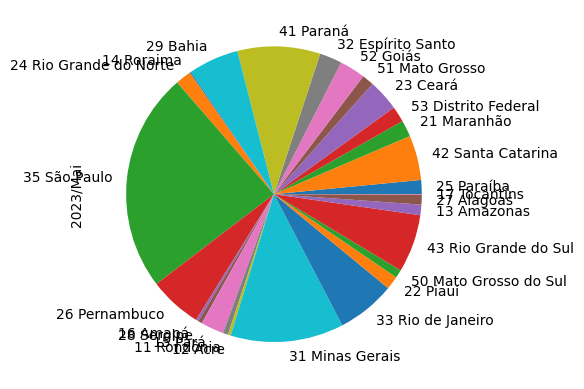

In [90]:
gastos_do_mais_recente.sample(frac=1).plot(kind="pie") #frac serve para trazer 60% dos dados ou 100% neste caso

In [91]:
gastos_do_mais_recente

Unidade da Federação
35 São Paulo             302.05
31 Minas Gerais          155.67
41 Paraná                113.84
43 Rio Grande do Sul      79.74
33 Rio de Janeiro         80.37
29 Bahia                  69.35
26 Pernambuco             72.83
42 Santa Catarina         61.52
23 Ceará                  43.21
52 Goiás                  35.28
15 Pará                   31.71
21 Maranhão               22.67
32 Espírito Santo         30.82
24 Rio Grande do Norte    21.66
53 Distrito Federal       21.65
25 Paraíba                19.41
50 Mato Grosso do Sul     11.23
22 Piauí                  18.32
51 Mato Grosso            16.23
27 Alagoas                13.64
13 Amazonas               14.40
28 Sergipe                 5.35
11 Rondônia                7.06
17 Tocantins               0.55
12 Acre                    3.81
14 Roraima                 1.72
16 Amapá                   3.56
Name: 2023/Mai, dtype: float64

In [96]:
tabela_comparacao = gastos_do_mais_recente / gastos_do_mais_recente.loc["41 Paraná"] # calculo de representidade em tamanho e nao %
tabela_comparacao.head()

Unidade da Federação
35 São Paulo           2.65
31 Minas Gerais        1.37
41 Paraná              1.00
43 Rio Grande do Sul   0.70
33 Rio de Janeiro      0.71
Name: 2023/Mai, dtype: float64

<Axes: ylabel='Unidade da Federação'>

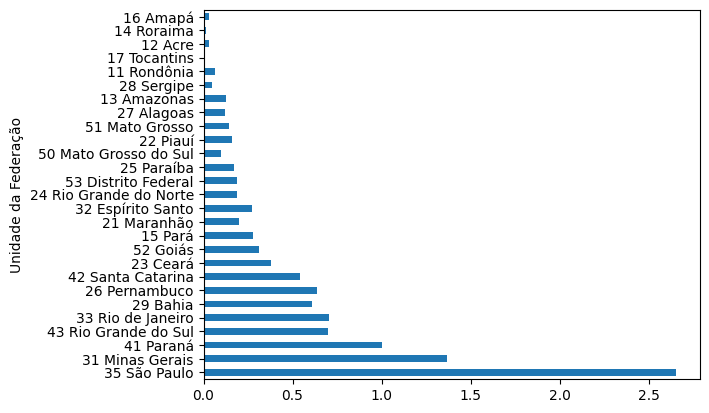

In [99]:
tabela_comparacao.plot(kind="barh") # o kind pie é pizza, o bar é barra e o barh é o de barra vertical

<Axes: xlabel='Unidade da Federação'>

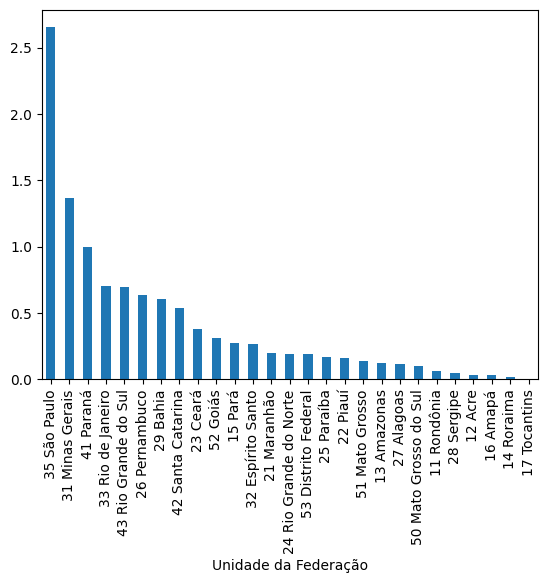

In [102]:
tabela_comparacao = tabela_comparacao.sort_values(ascending=False) # ordenando do maior para o menor
tabela_comparacao.plot(kind="bar")

Desafio passar uma linha horizontal mais chamada de linha de anotação

Desafio atualizar o ultimo grafico com o meu estado para analisar, incluindo grid e eixos

Desafio Colorir o meu estado com uma cor diferente e os outros estados com outras cores basedo nos gastos

Desafio Escolher 2 estados e plotar a comparação deles com a populacão (base IBGE)